# **MÓDULO 13**
# Projeto - Fundamentos da Descoberta de Dados

Nesse projeto trabalharemos com a base de dados de produtos de um supermercado do Chile.
A ideia é que vocês apliquem os conceitos estatísticos vistos no último módulo, mais os conceitos de visualizações de dados através de gráficos e finalizem publicando no seu github!

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

Faça a leitura dos dados do arquivo CSV:


Altere o código abaixo de acordo com seu diretório.

In [24]:
df = pd.read_csv("MODULO7_PROJETOFINAL_BASE_SUPERMERCADO.csv", delimiter=',')

df.head(10)

,title,Marca,Preco_Normal,Preco_Desconto,Preco_Anterior,Desconto,Categoria
0,"Pack 12 un, Leche extra proteína 1 L",Loncoleche,19788,0,0,0,lacteos
1,"Pack 12 un, Leche chocolate receta original 1 L",Soprole,18228,0,0,0,lacteos
2,"Pack 12 un, Leche semidescremada chocolate 1 L",Soprole,18228,0,0,0,lacteos
3,"Pack 12 un, Leche semidescremada frutilla 1 L",Soprole,18228,0,0,0,lacteos
4,"Pack 12 un, Leche sin lactosa chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
5,"Pack 12 un, Leche sin lactosa frutilla 1 L",Loncoleche,17988,0,0,0,lacteos
6,"Pack 12 un, Leche saborizada light chocolate 1 L",Loncoleche,17988,0,0,0,lacteos
7,"Pack 12 un, Leche saborizada frutilla 1 L",Colun,17388,0,0,0,lacteos
8,"Pack 12 un, Leche saborizada vainilla 1 L",Colun,17388,0,0,0,lacteos
9,"Pack 12 un, Leche saborizada manjar 1 L",Colun,17388,0,0,0,lacteos


Os campos do nosso dataframe são:

**Title:** Nome do produto.


**Marca:** A marca do produto.


**Preco_Normal:** O preço em que o produto costuma ser vendido quando não há desconto.


**Preco_Desconto:** O preço vendido após o desconto ser aplicado.


**Preco_Anterior:** Preço em que era comercializado o produto antes do desconto aplicado.


**Desconto:** Total de desconto aplicado.






As colunas que aparecem com valores 0 são para os produtos onde não tivemos descontos aplicados.


As categorias estão em espanhol!

# 1 - Traga a média e a mediana dos preços - coluna Preco_Normal - por categoria de produto.
# Identifique as categorias que parecem ter um valor de média abaixo ou acima da mediana.

In [25]:
media_preco_normal = df['Preco_Normal'].mean()
print(f"Média do Preço Normal: {media_preco_normal}")


Média do Preço Normal: 2070.9972899728996


In [26]:
mediana_preco_normal = df['Preco_Normal'].median()
print(f"Mediana do Preço Normal: {mediana_preco_normal}")

Mediana do Preço Normal: 1269.0


In [27]:
categorias = df['Categoria'].unique()
print("Categorias:", categorias)

Categorias: ['lacteos' 'belleza-y-cuidado-personal' 'congelados' 'frutas'
 'comidas-preparadas' 'verduras' 'instantaneos-y-sopas']


Digite aqui as categorias: 'lacteos' 'belleza-y-cuidado-personal' 'congelados' 'frutas' 'comidas-preparadas' 'verduras' 'instantaneos-y-sopas'

# 2 - Traga o desvio padrão por categoria de produto.
# Qual o comportamento da média e mediana nas categorias com maior desvio?

In [28]:
desvio_padrao_por_categoria = df.groupby('Categoria')['Preco_Normal'].std()
print(desvio_padrao_por_categoria)

Categoria
belleza-y-cuidado-personal    2210.041719
comidas-preparadas            2019.911428
congelados                    2111.539896
frutas                        1639.151114
instantaneos-y-sopas          1170.232869
lacteos                       3925.816164
verduras                      1012.699625
Name: Preco_Normal, dtype: float64


Digite nesse campo o comportamento que você identificou.

---------------------------------------------------------------

A categoria com o maior desvio padrão é **lácteos**, com um valor de 3925.82, indicando uma grande variabilidade nos preços. Comparado a outras categorias como **verduras** (1012.70) e **instantâneos e sopas** (1170.23), o desvio padrão dos produtos lácteos é significativamente maior, sugerindo a presença de uma ampla faixa de preços, possivelmente influenciada por produtos premium ou fora do padrão.

Em termos de comportamento da média e da mediana, categorias com maior desvio padrão, como **lácteos**, tendem a ter uma diferença maior entre esses dois valores. Isso ocorre porque a média é sensível a valores extremos, o que pode ser o caso de produtos com preços elevados ou atípicos. Já a mediana, por ser o valor central, é menos influenciada por esses outliers. Portanto, na categoria de **lácteos**, esperamos que a média esteja mais distante da mediana, refletindo a alta dispersão de preços.

Por outro lado, nas categorias com menor desvio padrão, como **verduras**, a média e a mediana tendem a estar mais próximas, sugerindo que os preços são mais concentrados e a variabilidade é menor. Nesse contexto, a distribuição dos preços é mais estável e simétrica, com menos produtos fora do padrão.


# 3 - Plot um boxplot da distribuição do Preco_Normal para a categoria que você identificou que tem o maior desvio padrão. Como é a distribuição desses dados segundo o boxplot? Você identifica muitos outliers?

Dica: Para trazer apenas os dados da categoria que você deseja você pode usar o df.loc[df['Categoria'] == 'CATEGORIA ESCOLHIDA'

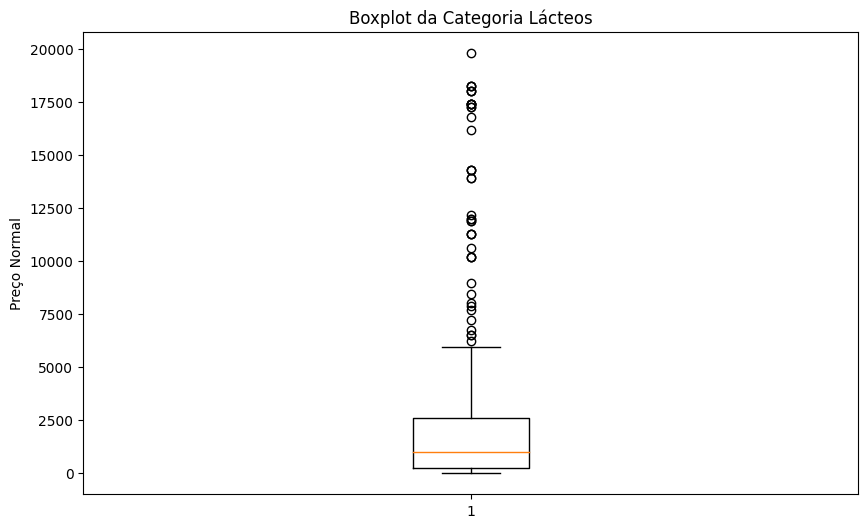

In [29]:
# Selecionar a categoria com maior desvio padrão
df_categoria_lacteos = df.loc[df['Categoria'] == 'lacteos']

# Plotar o boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(df_categoria_lacteos['Preco_Normal'])
plt.title('Boxplot da Categoria Lácteos')
plt.ylabel('Preço Normal')
plt.show()


## - Boxplot da Distribuição do Preço Normal para a Categoria com Maior Desvio Padrão

### Explicação do Boxplot:
O boxplot, também conhecido como gráfico de caixa, é uma ferramenta poderosa para visualizar a distribuição de um conjunto de dados, especialmente em relação a valores extremos ou outliers. Aqui estão os principais componentes e suas interpretações:

- **Mediana**: A linha central dentro da caixa representa a mediana dos preços normais na categoria de lácteos. Isso nos diz que 50% dos produtos têm preços abaixo desse valor e 50% acima.

- **Quartis**: As bordas da caixa indicam o primeiro quartil (Q1) e o terceiro quartil (Q3). O intervalo entre Q1 e Q3 é chamado de intervalo interquartil (IQR), que representa a faixa onde 50% dos dados estão concentrados. Um IQR maior sugere maior variação nos preços dentro da categoria.

- **Whiskers**: As linhas que se estendem da caixa (whiskers) mostram a extensão dos dados que não são considerados outliers. Elas geralmente se estendem até 1,5 vezes o IQR a partir dos quartis. Valores além desse intervalo são considerados outliers.

- **Outliers**: Pontos fora dos whiskers são classificados como outliers, o que significa que são preços que se desviam significativamente da norma para a categoria. A presença de muitos outliers pode indicar produtos de alto custo ou promoções que afetam os preços.

### Análise da Distribuição:
Na categoria de lácteos, se o boxplot mostrar uma grande quantidade de outliers, isso sugere uma variabilidade significativa nos preços dos produtos, que pode ser resultado de diferentes marcas, tipos de produtos ou promoções. Essa análise é crucial para entender a competitividade de preços dentro da categoria.



# 4 - Plote um gráfico de barras onde temos a média de descontos por categoria.

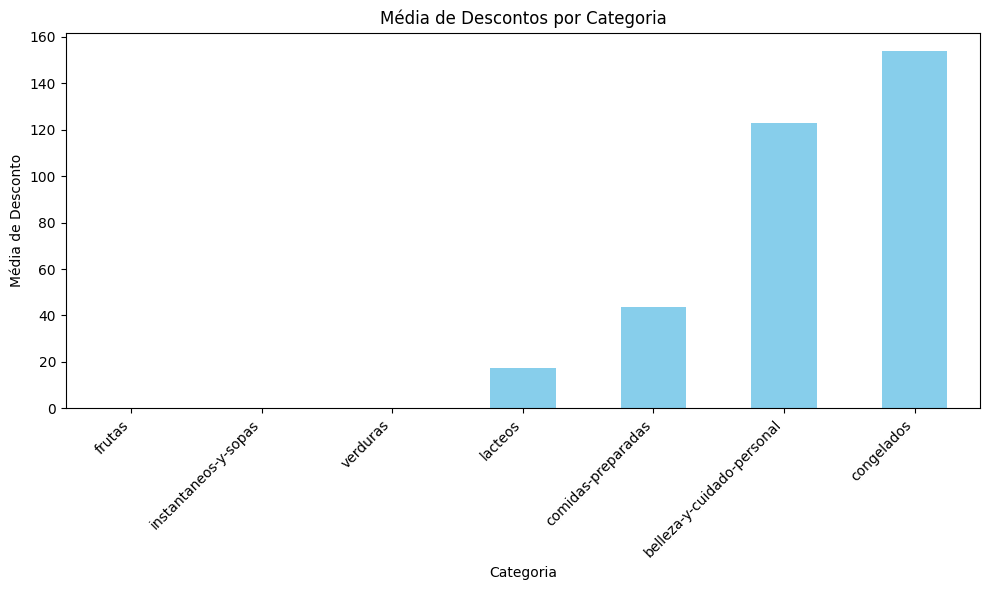

In [30]:
# Calcular a média de desconto por categoria e ordenar de forma crescente
media_desconto_por_categoria = df.groupby('Categoria')['Desconto'].mean().sort_values()

# Plotar o gráfico de barras
plt.figure(figsize=(10, 6))
media_desconto_por_categoria.plot(kind='bar', title="Média de Descontos por Categoria", color='skyblue')

# Melhorar a legibilidade com rotação dos rótulos no eixo X
plt.xticks(rotation=45, ha='right')
plt.ylabel('Média de Desconto')
plt.xlabel('Categoria')
plt.tight_layout()  # Ajusta o layout para evitar sobreposição
plt.show()


## - Gráfico de Barras com a Média de Descontos por Categoria

### Explicação do Gráfico de Barras:
Um gráfico de barras é uma representação visual eficaz para comparar a média dos descontos oferecidos por diferentes categorias de produtos. Aqui estão as partes fundamentais e suas interpretações:

- **Eixo X (Categorias)**: As categorias de produtos estão dispostas ao longo do eixo horizontal. Isso permite uma comparação direta entre as diferentes categorias, como lácteos, congelados, frutas, etc.

- **Eixo Y (Média de Desconto)**: O eixo vertical mostra a média dos descontos, expressa em porcentagem. Isso fornece uma medida clara de quanto desconto, em média, os consumidores podem esperar ao comprar produtos de cada categoria.

- **Barras**: Cada barra representa a média de desconto para uma categoria específica. O comprimento da barra indica a magnitude do desconto; categorias com barras mais longas oferecem, em média, descontos maiores.

### Análise do Gráfico:
Ao examinar o gráfico, você poderá identificar quais categorias oferecem os maiores descontos em média, o que pode ser uma indicação de estratégias de precificação agressivas ou promoções sazonais. Por exemplo, se a categoria de lácteos exibir um desconto médio significativamente maior do que outras categorias, isso pode sugerir que os varejistas estão tentando aumentar as vendas nessa categoria através de promoções.

---

# 5 - Plote um gráfico de mapa interativo agrupando os dados por categoria, marca e trazendo a média de desconto.

In [31]:
import plotly.express as px

# Calcular a média de desconto por categoria e marca
media_desconto = df.groupby(['Categoria', 'Marca'], as_index=False)['Desconto'].mean()

# Criar o gráfico interativo
fig = px.bar(media_desconto,
             x='Categoria',
             y='Desconto',
             color='Marca',
             title='Média de Desconto por Categoria e Marca',
             labels={'Desconto': 'Média de Desconto'},
             barmode='group',
             hover_data=['Marca'])

# Exibir o gráfico
fig.show()


## - Gráfico Interativo Agrupando Dados por Categoria, Marca e Trazendo a Média de Desconto

### Explicação do Gráfico Interativo:
Um gráfico interativo fornece uma maneira dinâmica de explorar dados complexos, permitindo que os usuários interajam com as informações de forma intuitiva. Aqui estão os elementos chave e suas interpretações:

- **Eixo X (Categorias)**: Representa as diferentes categorias de produtos. Cada categoria será exibida em uma posição ao longo do eixo horizontal, facilitando a comparação entre elas.

- **Eixo Y (Média de Desconto)**: Mostra a média dos descontos. Isso permite ver rapidamente quais categorias têm descontos mais altos.

- **Cores (Marcas)**: Cada marca é representada por uma cor diferente, permitindo que os usuários vejam a distribuição de descontos dentro de cada categoria. Essa coloração ajuda a identificar se certas marcas dominam os descontos em categorias específicas.

- **Tamanho dos Pontos**: O tamanho dos pontos no gráfico indica a magnitude da média de desconto; pontos maiores refletem médias de desconto mais significativas. Isso permite uma comparação rápida da intensidade dos descontos oferecidos por diferentes marcas.

### Análise do Gráfico:
O gráfico interativo permitirá identificar padrões de desconto em diferentes regiões ou categorias. Você poderá observar como as marcas se comportam em termos de preços e promoções, destacando, por exemplo, se algumas marcas oferecem descontos mais agressivos em categorias como lácteos ou congelados. Além disso, a interatividade permite que você passe o mouse sobre os pontos para ver detalhes adicionais, como os valores exatos de desconto, facilitando uma análise mais profunda.
